# HW 5 Q1

           mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   0.07  0.02    0.03     0.10        0.0      0.0   2807.71   
betas[1]   0.19  0.02    0.16     0.22        0.0      0.0   3088.45   
betas[2]  -0.05  0.02   -0.07    -0.02        0.0      0.0   3114.35   
betas[3]   0.00  0.02   -0.03     0.04        0.0      0.0   2425.69   
betas[4]  -0.02  0.02   -0.05     0.01        0.0      0.0   2783.40   
betas[5]   0.10  0.02    0.07     0.13        0.0      0.0   2431.60   
betas[6]   0.05  0.01    0.02     0.08        0.0      0.0   3088.23   
betas[7]   0.03  0.02   -0.00     0.07        0.0      0.0   2795.15   
intercept  0.35  0.01    0.32     0.38        0.0      0.0   2228.83   
sigma      0.40  0.01    0.38     0.42        0.0      0.0   2727.12   

           ess_tail  r_hat  
betas[0]    1844.89    1.0  
betas[1]    1639.66    1.0  
betas[2]    1538.74    1.0  
betas[3]    1485.12    1.0  
betas[4]    1603.09    1.0  
betas[5]    1587.05    1.0  
beta

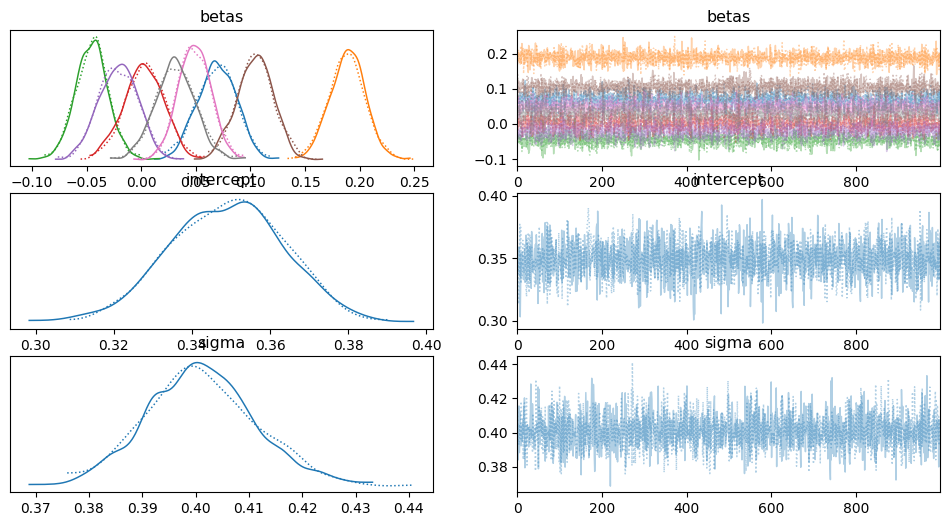

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

In [10]:
import pymc as pm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import arviz as az

# Load the dataset
data = pd.read_csv('diabetes.csv')  # Make sure to use the correct path

# Prepare the data
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n, p = X_scaled.shape

with pm.Model() as MLR:
    # Priors for regression coefficients
    betas = pm.MvNormal('betas', mu=np.zeros(p), cov=np.eye(p), shape=(p,))
    # Intercept
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    # Prior for the standard deviation of the data
    sigma = pm.HalfNormal('sigma', sigma=1)
    # Expected value of outcome
    mu = pm.math.dot(X_scaled, betas) + intercept
    # Likelihood of observations
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    # Sample from the posterior
    trace = pm.sample(1000, return_inferencedata=True)

# Summarize the trace
print(az.summary(trace, round_to=2))

# Posterior predictive checks
with MLR:
    ppc = pm.sample_posterior_predictive(trace)



# Traceplot for visual inspection of sampling efficiency and convergence
az.plot_trace(trace)
plt.show()



## HW5 Q2.1


Given the posterior distribution
\begin{align*}
\beta|\Sigma, X, y
\end{align*}
expressed in terms of the covariance matrix
\begin{align*}
\Sigma,
\end{align*}
we can re-express it in terms of the variance
\begin{align*}
\sigma^2
\end{align*}
by substituting  
\begin{align*}
\Sigma  
\end{align*}  
with
\begin{align*}
\sigma^2I
\end{align*}
where  
\begin{align*}
\sigma^2 = \frac{1}{\tau}.
\end{align*}
This substitution reflects a simplifying assumption that the error variances are identical across all dimensions and independent, leading to a diagonal covariance matrix. Consequently, the inverse of the covariance matrix,
\begin{align*}
\Sigma^{-1},
\end{align*}
becomes
\begin{align*}
\tau I,
\end{align*}
where
\begin{align*}
I
\end{align*}
is the identity matrix and
\begin{align*}
\tau
\end{align*}
is the precision, the reciprocal of the variance. The updated expressions for the expectation and variance of the posterior distribution of
\begin{align*}
\beta
\end{align*}
are:

\begin{align*}
\mathbb{E}[\beta] &= (X^TX + \tau I)^{-1}X^Ty \\
\text{Var}[\beta] &= (X^TX + \tau I)^{-1}
\end{align*}

These equations represent the mean and variance of the posterior distribution for
\begin{align*}
\beta
\end{align*}
in a Bayesian linear regression model, where the prior distribution of
\begin{align*}
\beta
\end{align*}
is assumed to be multivariate normal with mean zero and variance
\begin{align*}
\sigma^2I.
\end{align*}


## HW5 Q2.2

\begin{align*}
&\text{The expected value of } \beta \text{ given the covariance matrix } \Sigma, \text{ the design matrix } X, \text{ and the observed outcomes } y, \text{ denoted as } \mathbb{E}[\beta|\Sigma, X, y], \text{ is calculated using the formula:} \\
&\mathbb{E}[\beta|\Sigma, X, y] = (X^TX + \Sigma^{-1})^{-1}X^Ty
\end{align*}
This represents the posterior mean of the regression coefficients in a Bayesian multivariate normal regression model, where $\Sigma$ is the prior covariance matrix of the coefficients, $X$ is the matrix of predictors, and $y$ is the vector of observed responses. The term $(X^TX + \Sigma^{-1})^{-1}$ is the precision matrix of the posterior distribution, and $X^Ty$ is the product of the transpose of $X$ and $y$.





## HW5 Q2.3

For the expectation $\mathbb{E}[\beta|\Sigma, X, y]$ to equal $(X^TX)^{-1}X^Ty$, we require that $\Sigma^{-1}$, the precision matrix of the prior distribution, approaches the zero matrix. However, since $\Sigma$ is a covariance matrix, it is by definition positive semi-definite, and its inverse is positive definite, thus it cannot be the zero matrix. The scenario where the expectation equals the ordinary least squares (OLS) estimator is in the limit as the prior variance goes to infinity. Mathematically, this is expressed as:

\begin{align*}
\lim_{\Sigma \to \infty} \mathbb{E}[\beta|\Sigma, X, y] &= \lim_{\Sigma \to \infty} (X^TX + \Sigma^{-1})^{-1}X^Ty \\
&= (X^TX)^{-1}X^Ty
\end{align*}

This implies a non-informative prior for $\beta$, where the prior variance is infinite and the prior's influence on the posterior is negligible.



## HW5 Q2.4

To make the expectation $\mathbb{E}[\beta|\Sigma, X, y]$ equal to $(X^TX)^{-1}X^Ty$, we would need $\Sigma^{-1}$ to be the zero matrix. However, this is not possible because $\Sigma$ is a covariance matrix and must be positive semi-definite, thus its inverse (if it exists) is positive definite and cannot be the zero matrix.

The only scenario where $\mathbb{E}[\beta|\Sigma, X, y]$ would equal $(X^TX)^{-1}X^Ty$ is in the limit as the prior variance goes to infinity, which reflects a non-informative prior for $\beta$. This can be represented mathematically as:

\begin{align*}
\lim_{\Sigma \to \infty} \mathbb{E}[\beta|\Sigma, X, y] &= \lim_{\Sigma \to \infty} (X^TX + \Sigma^{-1})^{-1}X^Ty \\
&= (X^TX)^{-1}X^Ty
\end{align*}

In practice, setting a very large value for the elements of $\Sigma$ (or a very small value for elements of $\Sigma^{-1}$) approximates this condition, but no finite value will exactly yield the ordinary least squares (OLS) estimator.


## HW5 Q2.5

\begin{align*}\text{Var}[\beta|\Sigma, X, y] = (X^TX + \Sigma^{-1})^{-1}\end{align*}


# HW5 Q3

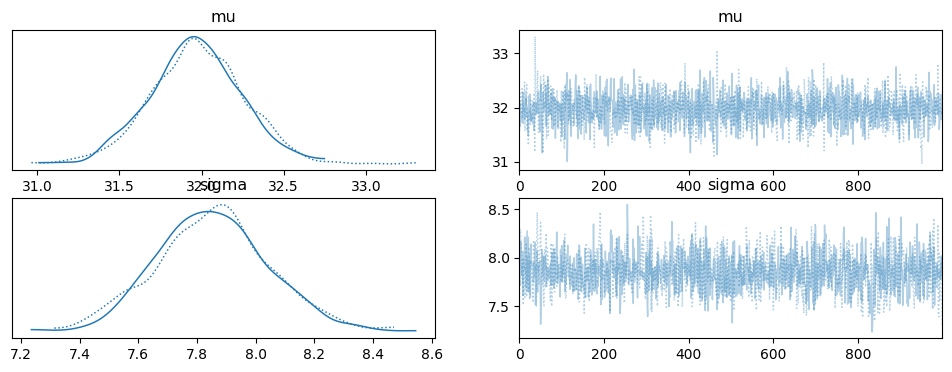

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,31.971,0.279,31.417,32.462,0.006,0.004,2100.0,1675.0,1.0
sigma,7.855,0.192,7.504,8.222,0.005,0.003,1551.0,1044.0,1.0


In [19]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
from scipy import stats
import matplotlib.pyplot as plt

# Read the diabetes data
df = pd.read_csv('diabetes.csv')

# Select the feature we want to model, for example "BMI"
y = df['BMI'].dropna().values  # Assuming BMI is a single column

with pm.Model() as model:
    # Priors for the mean and standard deviation
    mu = pm.Normal('mu', mu=0, sigma=15)
    sigma = pm.Exponential('sigma', 1.0)

    # Normal distribution for the observed data
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    # Sample from the posterior
    trace = pm.sample(return_inferencedata=True)

# Check the convergence
az.plot_trace(trace)
plt.show()

# Summary of the posterior distribution for parameters
az.summary(trace)

